In [174]:
import pandas as pd
from ast import literal_eval
import numpy as np
from sklearn.metrics import f1_score
from itertools import product
import matplotlib.pyplot as plt

In [175]:
PATH = 'percentages.csv'

In [176]:
df = pd.read_csv(PATH)
df.head()

,text_ids,labels,annotators_percentage,llama_percentage,mistral_percentage
0,medium-17,1,0.888889,0.333333,1.000000
1,medium-17,0,0.666667,0.000000,0.222222
2,medium-17,1,0.111111,1.000000,0.888889
3,medium-17,1,0.444444,0.888889,0.333333
4,medium-17,1,0.444444,0.000000,0.444444


In [177]:
labels = df['labels']
ann_percentage = df['annotators_percentage']
llama_percentage = df['llama_percentage']
mistral_percentage = df['mistral_percentage']

In [178]:
def divide(array):
    borders = [(0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1)]
    
    values = []
    # indices = []
    for range in borders:
        v = []
        # i = []
        for idx, x in enumerate(array):
            if (x >= range[0]) & (x < range[1]):
                v.append(x)
                # i.append(idx)
        
        values.append(v)
        # indices.append(i)
    return values#, indices

In [179]:
ann_divided = divide(ann_percentage)
llama_divided = divide(llama_percentage)
mistral_divided = divide(mistral_percentage)

In [180]:
len(ann_divided[1]) + len(llama_divided[1])

49

In [185]:
def numbers_matrix(annotators, llm):
    matrix = []
    for x in llm:
        l1 = len(x)
        row = []
        for y in annotators:
            l2 = len(y)
            row.append(l1+l2)
        matrix.append(row)
    return np.array(matrix)

In [186]:
ann_llama_matrix = numbers_matrix(ann_divided, llama_divided)
ann_mistral_matrix = numbers_matrix(ann_divided, mistral_divided)
ann_llama_matrix, ann_mistral_matrix
# redovi su llmovi, stupci su anotatori

(array([[ 70,  92, 107, 104,  71],
        [ 27,  49,  64,  61,  28],
        [ 26,  48,  63,  60,  27],
        [ 25,  47,  62,  59,  26],
        [ 21,  43,  58,  55,  22]]),
 array([[34, 56, 71, 68, 35],
        [47, 69, 84, 81, 48],
        [54, 76, 91, 88, 55],
        [38, 60, 75, 72, 39],
        [34, 56, 71, 68, 35]]))

In [187]:
def plot_matrix(matrix, title):
    plt.imshow(matrix, cmap='magma', interpolation='nearest')
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            plt.text(j, i, str(matrix[i, j]), ha='center', va='center', color='white')
            
    plt.xlabel('Annotators')
    plt.ylabel('Model')
    
    plt.xticks(np.arange(matrix.shape[1]), ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
    plt.yticks(np.arange(matrix.shape[0]), ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
    plt.gca().invert_yaxis()
    
    plt.title(title)
    plt.show()

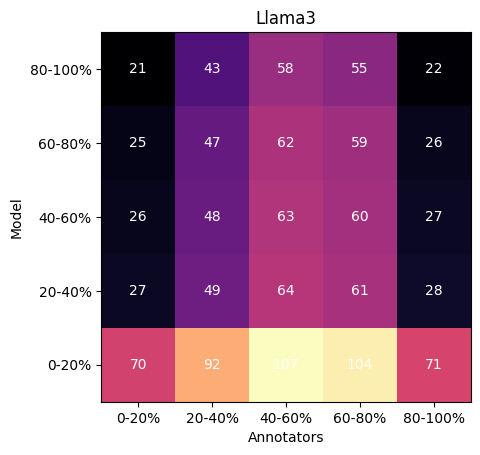

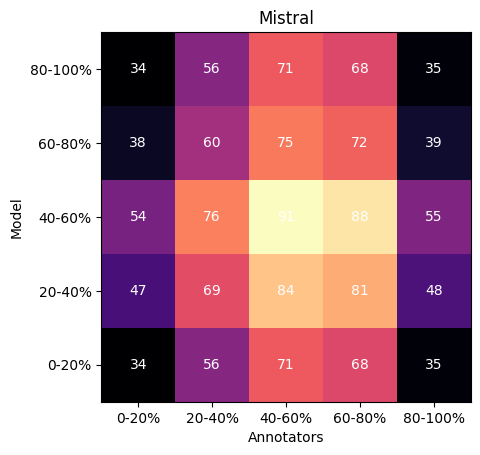

In [188]:
plot_matrix(ann_llama_matrix, 'Llama3')
plot_matrix(ann_mistral_matrix, 'Mistral')

In [189]:
def make_labels(matrix):
    labels = []
    for row in matrix:
        row = [1 if x > 0.5 else 0 for x in row]
        labels.append(row)
    return labels

In [190]:
ann_labels = make_labels(ann_divided)
llama_labels = make_labels(llama_divided)
mistral_labels = make_labels(mistral_divided)

In [192]:
def calculate_f1s(matrix):
    f1s = []
    for row in matrix:
        labels = np.ones(len(row))
        f1s.append(f1_score(labels, row))
    return f1s

In [196]:
ann_f1s = calculate_f1s(ann_labels)
llama_f1s = calculate_f1s(llama_labels)
mistral_f1s = calculate_f1s(mistral_labels)
ann_f1s, llama_f1s, mistral_f1s

([0.0, 0.0, 0.5373134328358209, 1.0, 1.0],
 [0.0, 0.0, 0.6, 1.0, 1.0],
 [0.0, 0.0, 0.6666666666666666, 1.0, 1.0])